<table>
<tr><td><img style="height: 150px;" src="images/geo_hydro1.jpg"></td>
<td bgcolor="#FFFFFF">
    <p style="font-size: xx-large; font-weight: 900; line-height: 100%">AG Dynamics of the Earth</p>
    <p style="font-size: large; color: rgba(0,0,0,0.5);">Jupyter notebooks</p>
    <p style="font-size: large; color: rgba(0,0,0,0.5);">Georg Kaufmann</p>
    </td>
</tr>
</table>

# Ice-age dynamics: 8. Sea level
## Gravity
----
*Georg Kaufmann,
Geophysics Section,
Institute of Geological Sciences,
Freie Universität Berlin,
Germany*

In this notebook, we model and plot **simple concepts on gravity and rotation** defined in the lecture, using `python`.

We first initialize the `python` libraries.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## Gravity of sphere

For a sphere with mass $M$ [kg], the gravitational force $\vec{F}_1$ [N] is given as
$$
 \vec{F_1} = -G \frac{m M}{r^2} \, \hat{r}
$$
with $m$ [kg] the sample mass, $G$ the gravitational constant [m$^3$kg$^{-1}$s$^{-2}$], 
$r$ [m] the distance between $M$ and $m$,
and $\hat{r}$ the unit vector.

From Newton's second law, 
$$
\vec{F_1} = m \vec{g},
$$
which relates gravitational acceleration $\vec{g}$ [m/s$^2$] to gravitational force,
we can derive 
$$
\vec{g} = -\frac{GM}{r^2} \, \hat{r}
$$

## Spherically symmetric Earth, outside

We assume that the Earth as a sphere has a mass of
$M=5.972 \times 10^{24}$ kg and a radius of $R=6371$ km.
The gravitational constant for the Earth is
$G=6.67408 \times 10^{-11}$ m$^3$kg$^{-1}$s$^{-2}$.

Once we assume that density is constant within the Earth (spherical symmetry),
we can calculate the only non-zero component of the gravitational acceleration:
$$
|g_z| = \frac{GM}{r^2}
$$

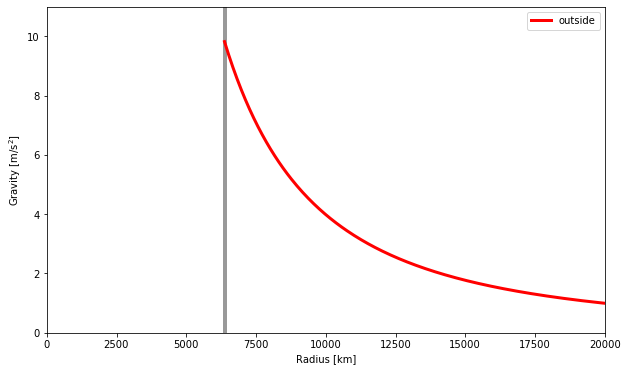

In [2]:
"""
gravitational acceleration outside of Earth
for a homogeneous sphere
"""
𝐺 = 6.67408e-11
M = 5.972e24

r = np.arange(6371,20000,50)
gz = G*M/(r*1000)**2

plt.figure(figsize=(10,6))
plt.xlabel('Radius [km]')
plt.xlim([0,20000])
plt.ylim([0,11])
plt.ylabel('Gravity [m/s$^2$]')
plt.plot([6371,6371],[0,12],linewidth='4',linestyle='-',color=(0.6,0.6,0.6))
plt.plot(r,gz,linewidth='3',color='red',label='outside')
plt.legend()

## Spherically symmetric Earth, inside

Calculating the gravitational acceleration **inside** the Earth needs a parameterisation of the mass
in terms of radius:
$$
M = \bar{\rho} V = \frac{4}{3} \pi \bar{\rho} r^3
$$
with $\bar{\rho}$ [kg/m$^3$] the *average* density of the Earth:
$$
\bar{\rho} = \frac{M}{V} = \frac{3 M}{4 \pi R^3} = 5511 \mbox{ kg/m}^3
$$

Inserting the mass in the gravitational acceleration yields
$$
|g_z| = \frac{GM}{r^2} = \frac{4}{3} \pi G \bar{\rho} r
$$

But why can we neglect the spherical shell **above** the calculation depth?
Here, **Newton's shell theorem** comes into play:
For an observation point inside a homogeneous shell, gravity sums up to zero.

From [wikipedia](https://en.wikipedia.org/wiki/Shell_theorem):
Isaac Newton proved the shell theorem and stated that:

- A spherically symmetric body affects external objects gravitationally as though all of its mass were concentrated at a point at its centre.
- If the body is a spherically symmetric shell (i.e., a hollow ball), no net gravitational force is exerted by the shell on any object inside, regardless of the object's location within the shell.

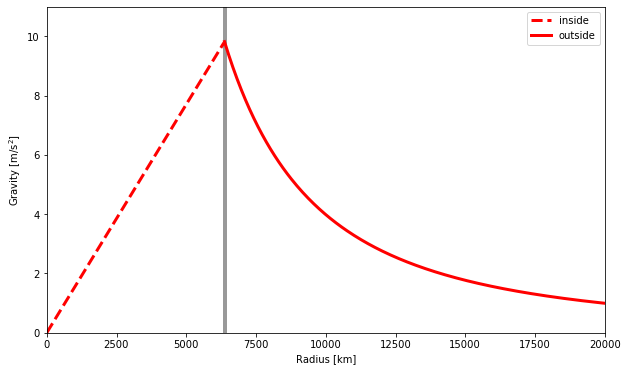

In [13]:
"""
gravitational acceleration inside and outside of Earth
for a homogeneous sphere
"""
𝐺 = 6.67408e-11
M = 5.972e24
rho = 5511.

rin  = np.arange(0,6371,50)
rout = np.arange(6371,20000,50)
gzin  = 4./3.*np.pi*G*rho*(rin*1000)
gzout = G*M/(rout*1000)**2

plt.figure(figsize=(10,6))
plt.xlabel('Radius [km]')
plt.xlim([0,20000])
plt.ylim([0,11])
plt.ylabel('Gravity [m/s$^2$]')
plt.plot([6371,6371],[0,12],linewidth='4',linestyle='-',color=(0.6,0.6,0.6))
plt.plot(rin,gzin,linewidth='3',linestyle='--',color='red',label='inside')
plt.plot(rout,gzout,linewidth='3',color='red',label='outside')
plt.legend()

## Comparison to PREM

Add gravity calculated from the density distribution of the **preliminary reference earth model** [PREM]
(https://de.wikipedia.org/wiki/PREM), see Dziewonski & Anderson (1981)$^1$.

$^1$ Dziewonski, A. M. & Anderson, D. L.: Preliminary reference Earth model, Physics of the Earth and Planetary Interiors, Band 25, S. 297–356, 1981. 

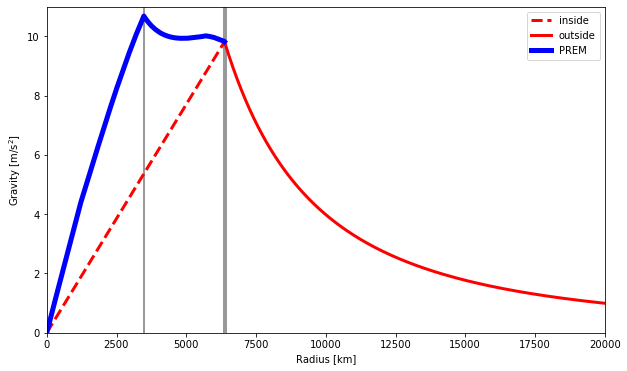

In [12]:
"""
gravitational acceleration outside of Earth
for a homogeneous sphere
plus PREM gravity
"""
#-----------------------------------------------------------------------
# read data into field
#-----------------------------------------------------------------------
infile1='data/PREM.z'
rprem=np.loadtxt(fname=infile1,skiprows=2,usecols=0)
gzprem=np.loadtxt(fname=infile1,skiprows=2,usecols=2)

𝐺 = 6.67408e-11
M = 5.972e24
rho = 5511.

rin  = np.arange(0,6371,50)
rout = np.arange(6371,20000,50)
gzin  = 4./3.*np.pi*G*rho*(rin*1000)
gzout = G*M/(rout*1000)**2

plt.figure(figsize=(10,6))
plt.xlabel('Radius [km]')
plt.xlim([0,20000])
plt.ylim([0,11])
plt.ylabel('Gravity [m/s$^2$]')
plt.plot([6371,6371],[0,12],linewidth='4',linestyle='-',color=(0.6,0.6,0.6))
plt.plot([3481,3481],[0,12],linewidth='2',linestyle='-',color=(0.6,0.6,0.6))
plt.plot(rin,gzin,linewidth='3',linestyle='--',color='red',label='inside')
plt.plot(rout,gzout,linewidth='3',color='red',label='outside')
plt.plot(rprem,gzprem,linewidth='5',color='blue',label='PREM')
plt.legend()

... and what is missing?

The stratified mantle and core of the Earth!